  **Problem Statement:**

  **Stroke is a critical medical condition that can lead to severe health complications and even death if not detected and treated promptly. Early prediction of stroke risk plays a crucial role in preventing strokes and minimizing their impact on individuals' lives. Machine learning techniques offer promising avenues for identifying patterns and risk factors associated with strokes, enabling proactive intervention strategies.**

  **The problem at hand is to develop a reliable predictive model that can accurately forecast the likelihood of an individual experiencing a stroke within a given timeframe. This prediction should be based on a comprehensive set of demographic, lifestyle, and clinical factors, including but not limited to age, gender, hypertension, heart disease, smoking status, alcohol consumption, and BMI.**





**About the dataset**



*  This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.



**Attribute Information:**



*   id: unique identifier
*   gender: "Male", "Female" or "Other"
*   age: age of the patient
*   hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
*   heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
*   ever_married: "No" or "Yes"
*   work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
*   Residence_type: "Rural" or "Urban"
*   avg_glucose_level: average glucose level in blood
*   bmi: body mass index
*   smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"
*   stroke: 1 if the patient had a stroke or 0 if not


**Dataset download link:** https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset















**Import required libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (5, 5)

**Read the datset**

In [2]:
df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

In [3]:
#GET THE FIRST 5 ROWS:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
#GET THE LIST OF COLUMNS IN DATASET:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [5]:
#GET THE STATISTICS OF DATA:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Here we can see that the count of "BMI" is less compared to other features. That means BMI has some null values.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Here the categorical features are - "Gender", "Ever_married", "Work_type", "Residence_type", "Smoking_status".
We need to handle these column. (Convert to numeric data)

**Exploratry Data Analysis**

**plot histogram of each parameter**

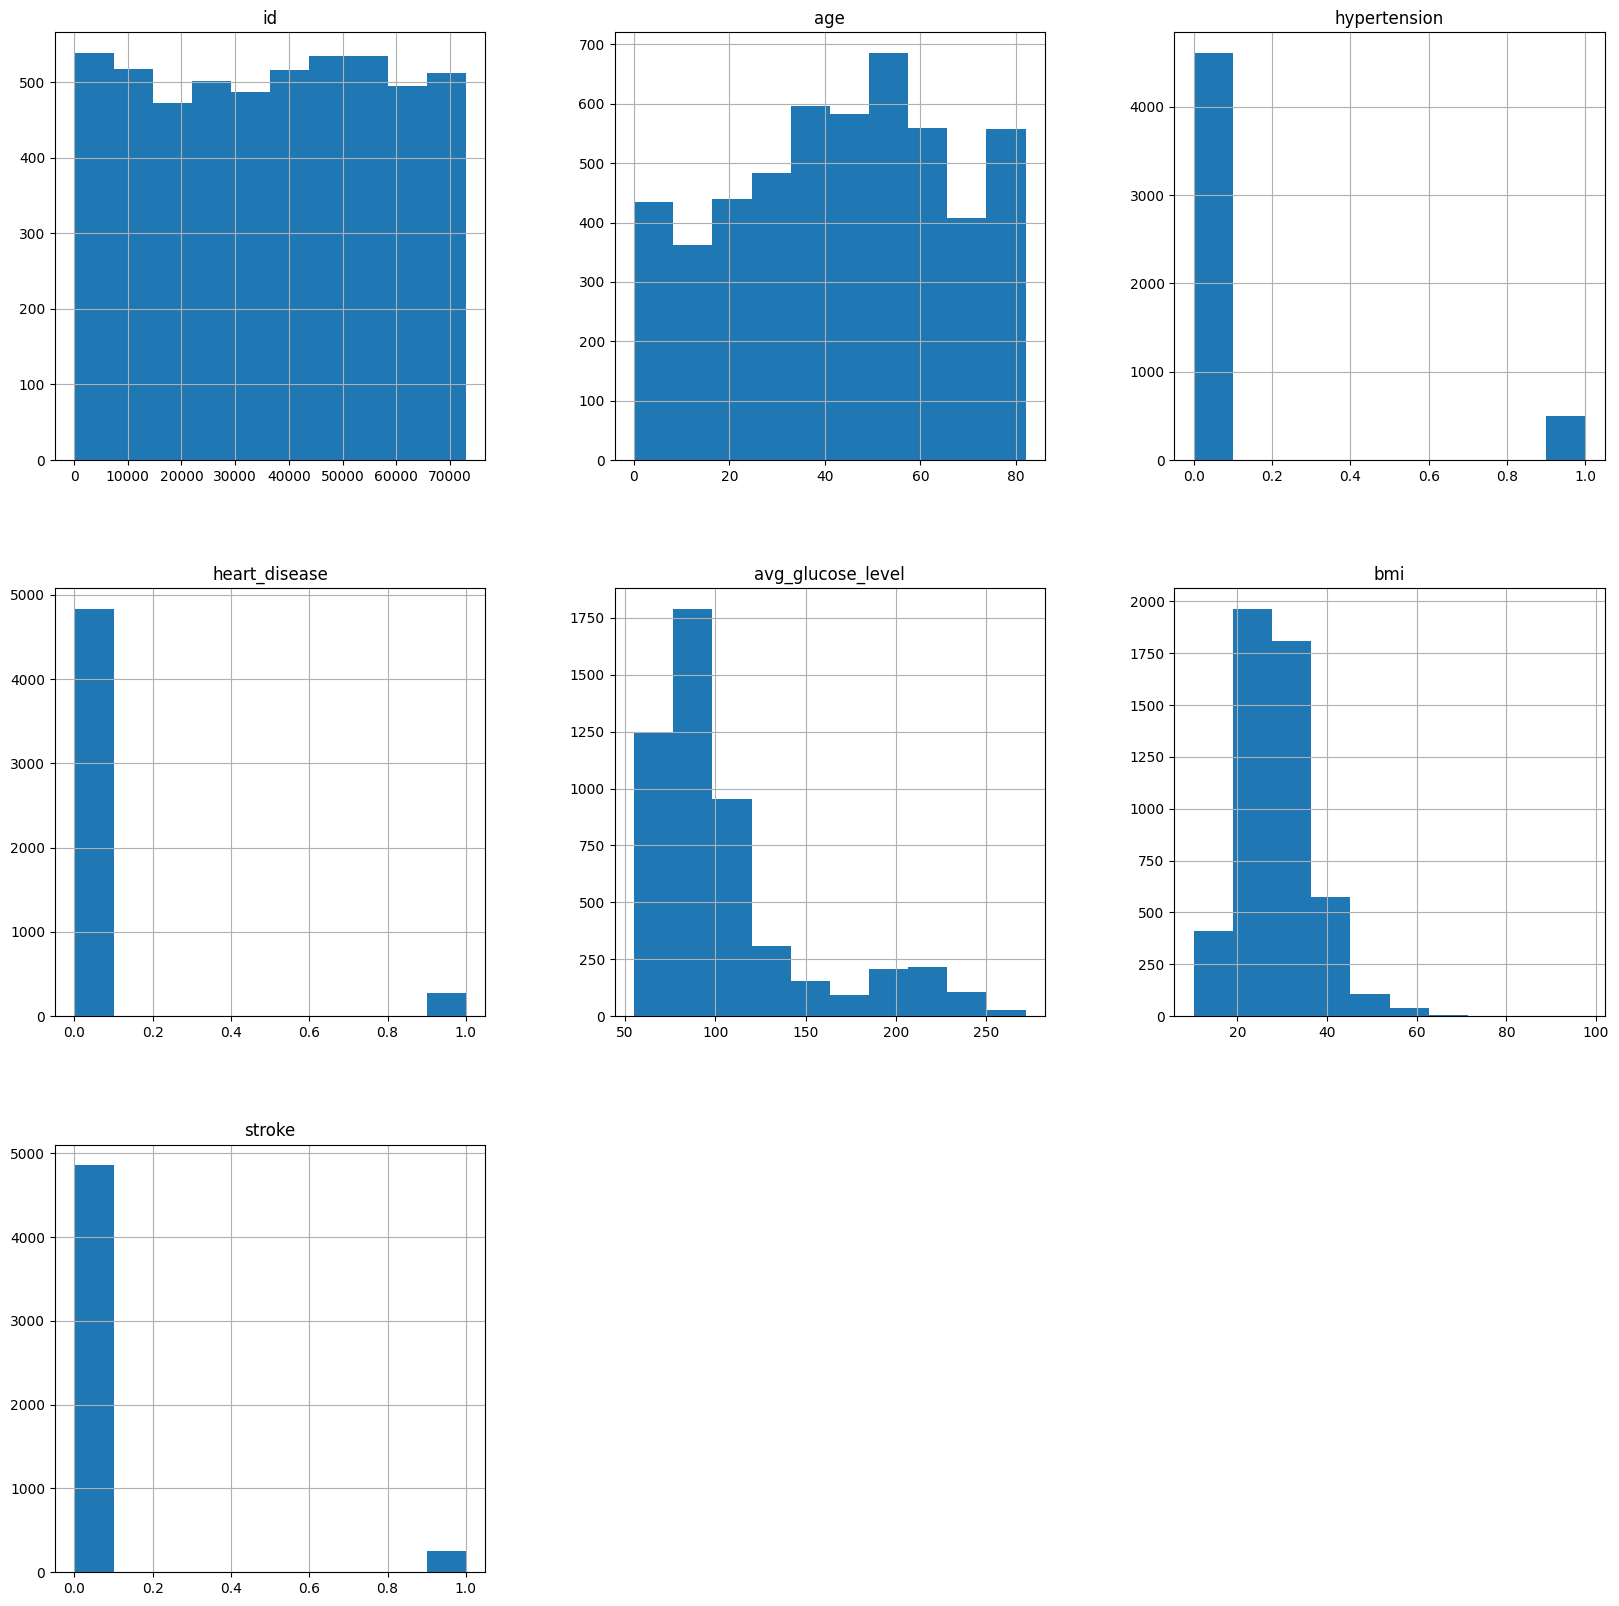

In [7]:
df.hist(figsize = (20, 20))
plt.show()

**Visualize the correlation**

<ipython-input-8-d065f79fa5ed>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap = 'Wistia')


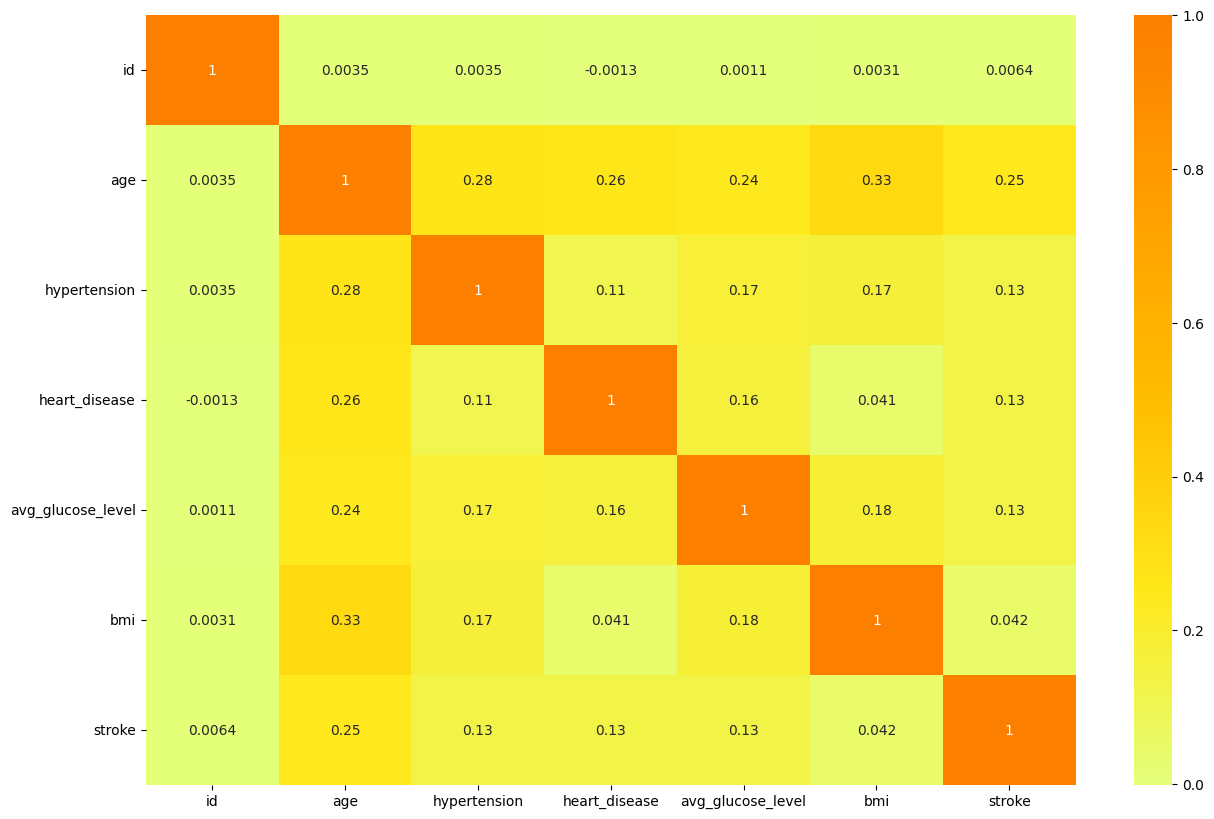

In [8]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap = 'Wistia')
plt.show()

**Distribution of bmi**

<ipython-input-9-cda51a603874>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'], color = 'cyan')


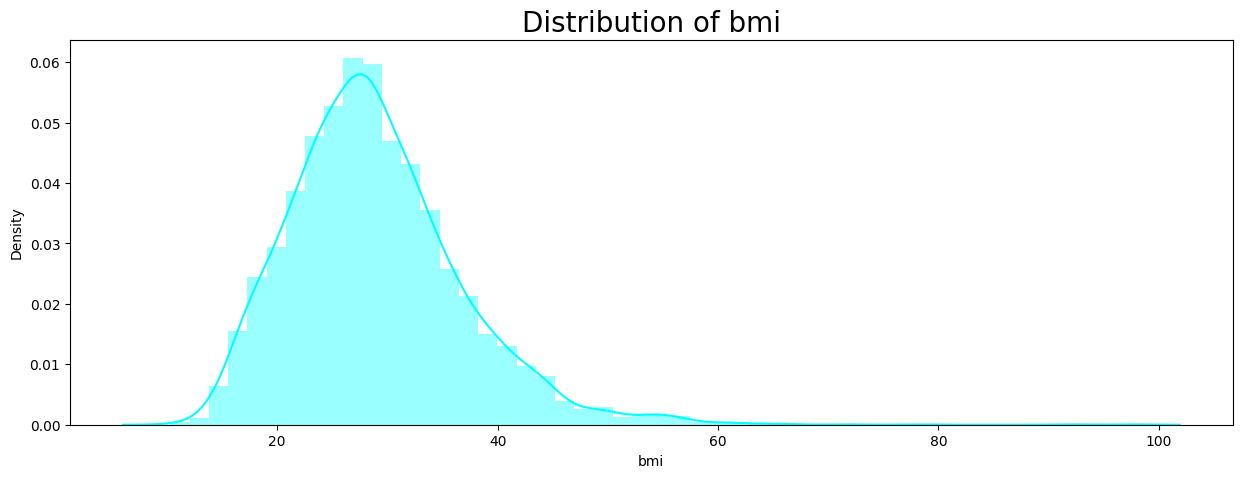

In [9]:
plt.subplots(figsize=(15,5))
sns.distplot(df['bmi'], color = 'cyan')
plt.title('Distribution of bmi', fontsize = 20)
plt.show()

**Distribution of avg_gulocose_level**

<ipython-input-10-a9082064d329>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['avg_glucose_level'], color = 'cyan')


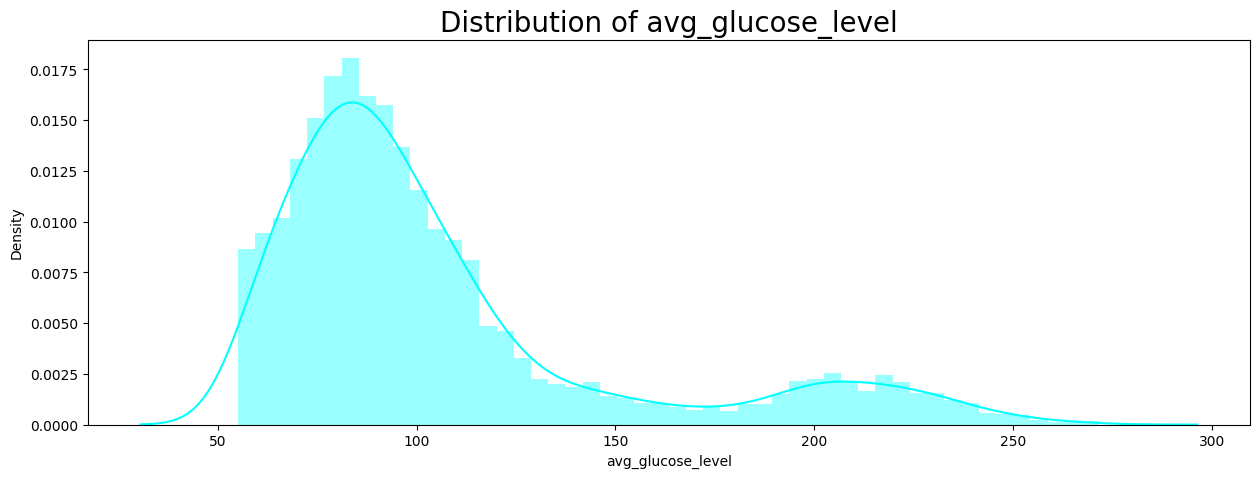

In [10]:
plt.subplots(figsize=(15,5))
sns.distplot(df['avg_glucose_level'], color = 'cyan')
plt.title('Distribution of avg_glucose_level', fontsize = 20)
plt.show()

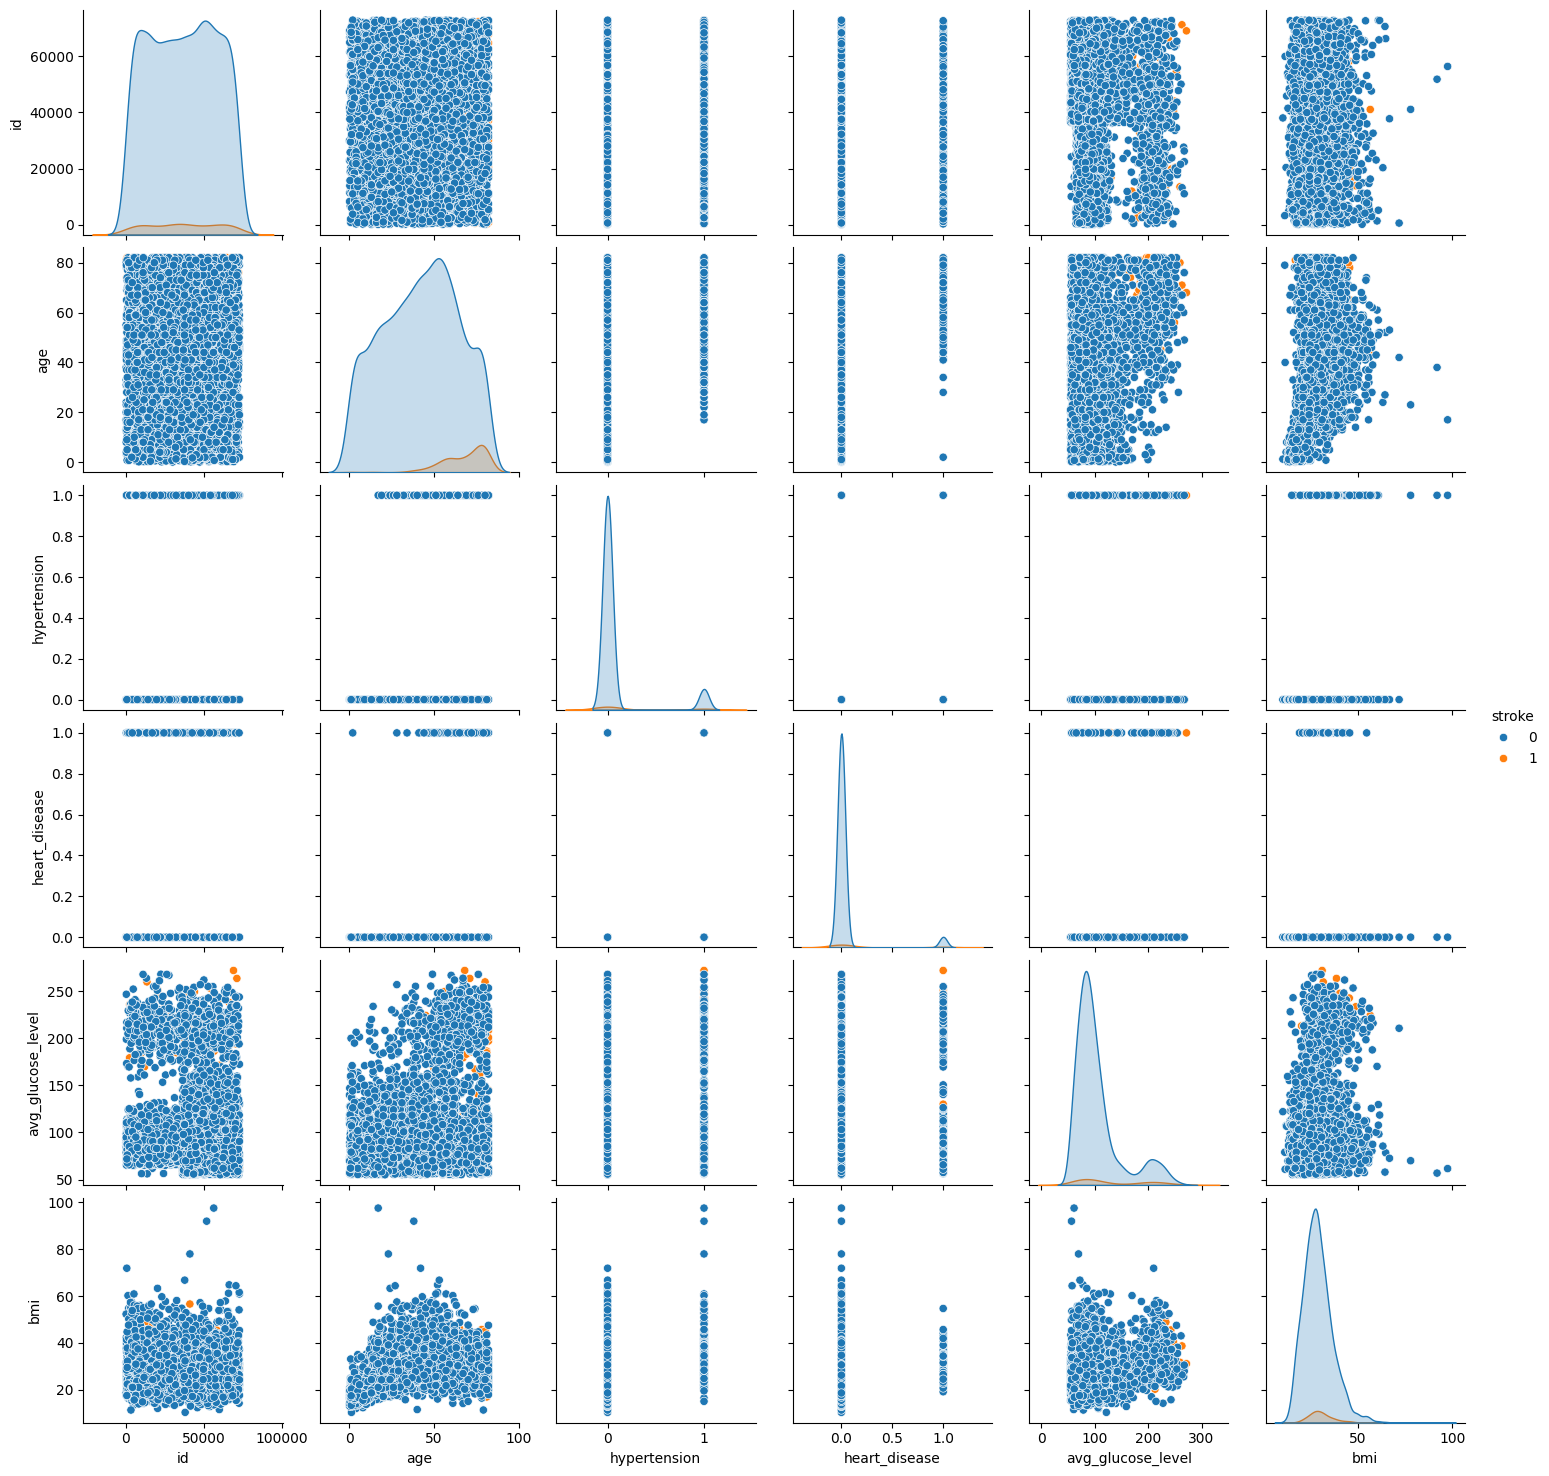

In [11]:
sns.pairplot(df, hue='stroke')

**Comparison of stroke feature**

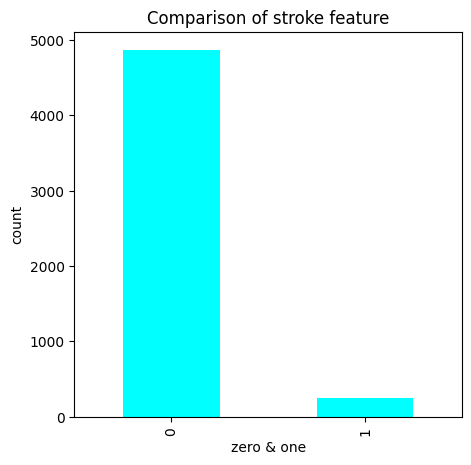

In [12]:
df['stroke'].value_counts(dropna = False).plot.bar(color = 'cyan')
plt.title('Comparison of stroke feature')
plt.xlabel('zero & one')
plt.ylabel('count')
plt.show()

Here we can see the data is imbalance. We'll handle this.

**Check the null values in the dataset**

In [13]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

here, we can see the missing values in "bmi" column.

**We are replacing the null values with mean of that feature.**

In [14]:
df['bmi'].fillna(df['bmi'].mean(),inplace=True)

In [15]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

**Here we can see that our data have zero null values.**

**Checking Outliers**

<Axes: >

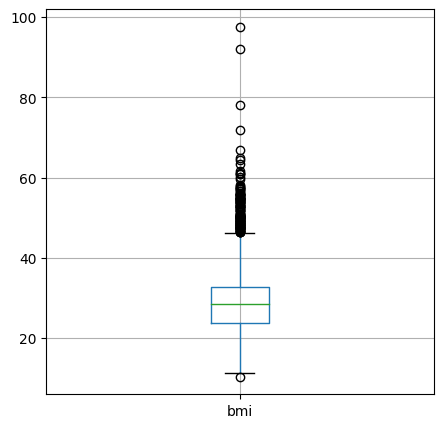

In [16]:
#BMI FEATURE:
df.boxplot(column='bmi')

<Axes: >

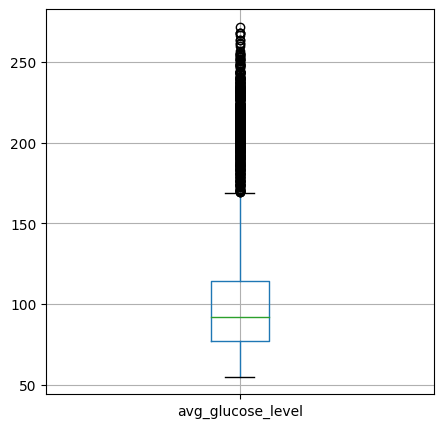

In [17]:
#AVG_GLUCOSE_LEVEL:
df.boxplot(column='avg_glucose_level')

<Axes: >

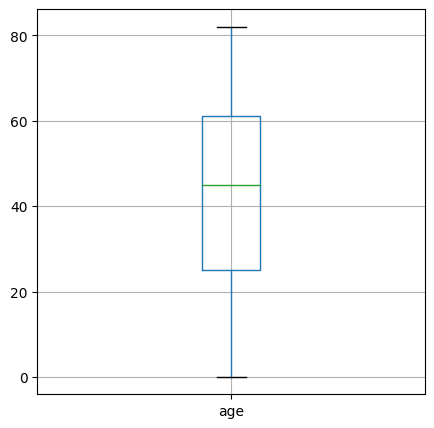

In [18]:
#Age:
df.boxplot(column='age')

Here we can see that there is some outliers in "bmi" and "avg_gulocose_level".

**Apply inter-quartile-range technique to handle outliers**

In [19]:
def handle_outliers_iqr(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    column = column.mask(column < lower_bound, column.median())
    column = column.mask(column > upper_bound, column.median())
    return column

# Apply outlier handling function to the 'Values' column
df['bmi'] = handle_outliers_iqr(df['bmi'])

print(df)

         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level        bmi  \
0           Private          Urban             228.69  36.600000   
1     Self-

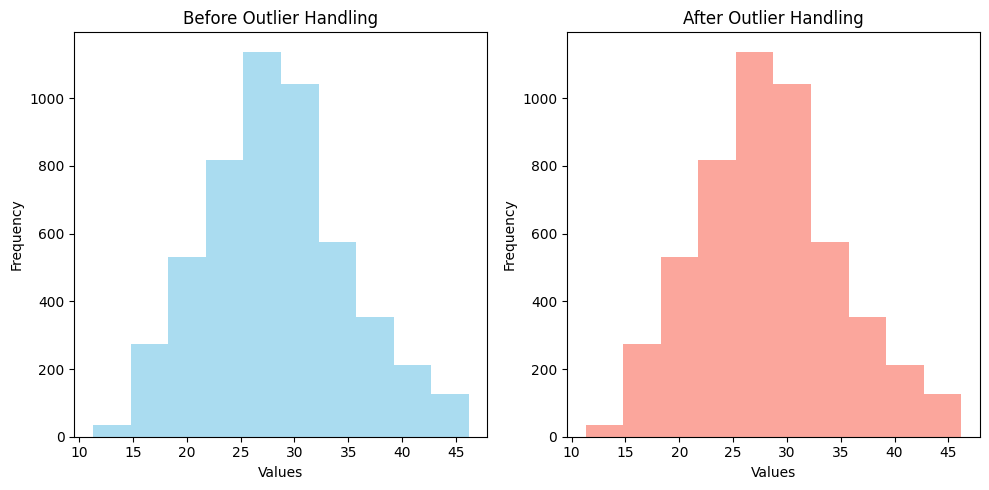

In [22]:
# Visualize the distribution before and after handling outliers
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(x=df['bmi'], bins=10, color='skyblue', alpha=0.7)
plt.title('Before Outlier Handling')
plt.xlabel('Values')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(x=df['bmi'], bins=10, color='salmon', alpha=0.7)
plt.title('After Outlier Handling')
plt.xlabel('Values')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [23]:
print("Summary Statistics Before Outlier Handling:")
print(df.describe())

print("\nSummary Statistics After Outlier Handling:")
print(df.describe())

Summary Statistics Before Outlier Handling:
                 id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  5110.000000  5110.000000  
mean          106.147677    28.287288     0.048728  
std            45.283560     6.548345     0.215320  
min            55.120000    11.300000     0.000000  
25%            77.245000    23.800000     0.000000  
50%            91.885000    28.400000     0.000000  

**checking the categorical column in dataframe**

In [25]:
categorical_columns_1 = [col for col in df.columns if df[col].dtype == 'object']
print("Categorical Columns (Method 1):", categorical_columns_1)

Categorical Columns (Method 1): ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


the categorical column are: 'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'



**Handle the categorical variable using label encoder**

In [24]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [26]:
gender=enc.fit_transform(df['gender'])
smoking_status=enc.fit_transform(df['smoking_status'])
work_type=enc.fit_transform(df['work_type'])
Residence_type=enc.fit_transform(df['Residence_type'])
ever_married=enc.fit_transform(df['ever_married'])

In [27]:
df['ever_married']=ever_married
df['Residence_type']=Residence_type
df['smoking_status']=smoking_status
df['gender']=gender
df['work_type']=work_type

In [28]:
df[['ever_married', 'Residence_type', 'smoking_status', 'gender', 'work_type']].head()

,ever_married,Residence_type,smoking_status,gender,work_type
0,1,1,1,1,2
1,1,0,2,0,3
2,1,0,2,1,2
3,1,1,3,0,2
4,1,0,2,0,3


In [29]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   int64  
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   int64  
 6   work_type          5110 non-null   int64  
 7   Residence_type     5110 non-null   int64  
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   int64  
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 479.2 KB


categorical feature are handled.

**Remove the unnecessary column in the dataframe**

**Remove the id column because its not required**

In [30]:
df = df.drop('id', axis=1)

In [31]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


**Now split the dataset in X&Y**

In [32]:
X = df.drop('stroke', axis=1)
y = df['stroke']

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (3577, 10)
Number transactions y_train dataset:  (3577,)
Number transactions X_test dataset:  (1533, 10)
Number transactions y_test dataset:  (1533,)


  **Handling imbalanced data:**

  

*   we will be using smote technique to handle the imbalanced data.



In [34]:
from imblearn.over_sampling import SMOTE

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 173
Before OverSampling, counts of label '0': 3404 

After OverSampling, the shape of train_X: (6808, 10)
After OverSampling, the shape of train_y: (6808,) 

After OverSampling, counts of label '1': 3404
After OverSampling, counts of label '0': 3404


Now the data is balanced.

**Model building using pre/process balanced data.**

**We can use logistic regression model.**

In [35]:
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report
import numpy as np
rdf_model = RandomForestClassifier()
rdf_model.fit(X_train_res, y_train_res)
print('Training accuracy Score: {}'.format(rdf_model.score(X_train_res, y_train_res)))
print('Test accuracy Score: {}'.format(rdf_model.score(X_test, y_test)))

Training accuracy Score: 1.0
Test accuracy Score: 0.9047619047619048


In [40]:
print('Confusion Matrix for Test Data:')
print(confusion_matrix(y_test, y_test))

Confusion Matrix for Test Data:
[[1457    0]
 [   0   76]]
